## Movie Ratings 2K Dataset EDA

## Basic Exploration and Cleaning

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../data/movie_ratings.csv")

In [4]:
df.shape

(212595, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


**Drop rows with missing data**

In [6]:
df.isna().sum()

user_id         0
movie_id        0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
title           0
year           36
decade         36
genres          0
rating_year     0
dtype: int64

In [7]:
original_row_count = len(df)

df = df.dropna()

print(f"Droppped {original_row_count - len(df)} rows")
print(f"Rows: {len(df)}")

Droppped 36 rows
Rows: 212559


In [8]:
# drop rows where genre is unknown
original_row_count = len(df)

unknown_filter = df["genres"] == "unknown"
print(len(df[unknown_filter]))
df.drop(df[unknown_filter].index, inplace=True)

print(f"Droppped {original_row_count - len(df)} rows")
print(f"Rows: {len(df)}")

1
Droppped 1 rows
Rows: 212558


In [9]:
df.reset_index(inplace=True)

**Convert columns to proper data types**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212558 entries, 0 to 212557
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        212558 non-null  int64  
 1   user_id      212558 non-null  int64  
 2   movie_id     212558 non-null  int64  
 3   rating       212558 non-null  int64  
 4   timestamp    212558 non-null  object 
 5   age          212558 non-null  int64  
 6   gender       212558 non-null  object 
 7   occupation   212558 non-null  object 
 8   zip_code     212558 non-null  object 
 9   title        212558 non-null  object 
 10  year         212558 non-null  float64
 11  decade       212558 non-null  float64
 12  genres       212558 non-null  object 
 13  rating_year  212558 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 22.7+ MB


In [11]:
# convert year and decade from floats to ints
df["year"] = df["year"].astype("int64")
df["decade"] = df["decade"].astype("int64")

# convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [12]:
df.dtypes

index                   int64
user_id                 int64
movie_id                int64
rating                  int64
timestamp      datetime64[ns]
age                     int64
gender                 object
occupation             object
zip_code               object
title                  object
year                    int64
decade                  int64
genres                 object
rating_year             int64
dtype: object

**Understand data values**

In [13]:
df.describe()

,index,user_id,movie_id,rating,timestamp,age,year,decade,rating_year
count,212558.000000,212558.000000,212558.000000,212558.000000,212558,212558.000000,212558.000000,212558.000000,212558.000000
mean,106297.559904,464.532824,390.433345,3.551219,1997-12-30 18:47:10.328098560,32.771498,1987.563183,1982.602207,1997.469298
min,0.000000,1.000000,1.000000,1.000000,1997-09-20 03:05:10,7.000000,1922.000000,1920.000000,1997.000000
25%,53154.250000,255.000000,164.000000,3.000000,1997-11-13 18:57:55,24.000000,1984.000000,1980.000000,1997.000000
50%,106299.500000,450.000000,293.000000,4.000000,1997-12-22 20:54:15,30.000000,1994.000000,1990.000000,1997.000000
75%,159440.750000,688.000000,568.000000,4.000000,1998-02-23 20:45:54,40.000000,1996.000000,1990.000000,1998.000000
max,212594.000000,943.000000,1682.000000,5.000000,1998-04-22 23:10:38,73.000000,1998.000000,1990.000000,1998.000000
std,61368.616574,267.293285,312.166719,1.119534,NaN,11.452649,13.990714,13.687468,0.499058


In [14]:
df.describe(include="object")

,gender,occupation,zip_code,title,genres
count,212558,212558,212558,212558,212558
unique,2,21,795,1658,18
top,M,student,55414,Star Wars (1977),Drama
freq,158866,47694,2385,2915,39894


**Export cleaned data**

In [15]:
df.to_csv("../../data/cleaned_movie_ratings.csv", index=False)

## Analysis

In [16]:
df = pd.read_csv("../../data/cleaned_movie_ratings.csv", parse_dates=["timestamp"])
print(df.shape)
df.info()

(212558, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212558 entries, 0 to 212557
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        212558 non-null  int64         
 1   user_id      212558 non-null  int64         
 2   movie_id     212558 non-null  int64         
 3   rating       212558 non-null  int64         
 4   timestamp    212558 non-null  datetime64[ns]
 5   age          212558 non-null  int64         
 6   gender       212558 non-null  object        
 7   occupation   212558 non-null  object        
 8   zip_code     212558 non-null  object        
 9   title        212558 non-null  object        
 10  year         212558 non-null  int64         
 11  decade       212558 non-null  int64         
 12  genres       212558 non-null  object        
 13  rating_year  212558 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 22.7+ MB


**1. What's the breakdown of genres for the movies that were rated?**

Text(0, 0.5, 'Genre')

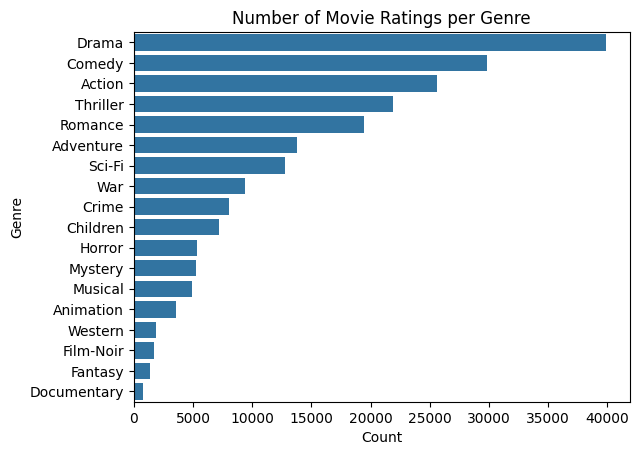

In [23]:
# how many movies where in each genre? need genre name and count
# percentage and absolute count on a bar graph, vertical axis has genre names, bars sorted by length

genre_df = df.groupby("genres")["user_id"].count().sort_values(ascending=False).to_frame("count")
ax = sns.barplot(genre_df, x="count", y=genre_df.index, orient="h")
ax.set_title("Number of Movie Ratings per Genre")
ax.set_xlabel("Count") 
ax.set_ylabel("Genre")

Text(50.72222222222221, 0.5, 'Genre')

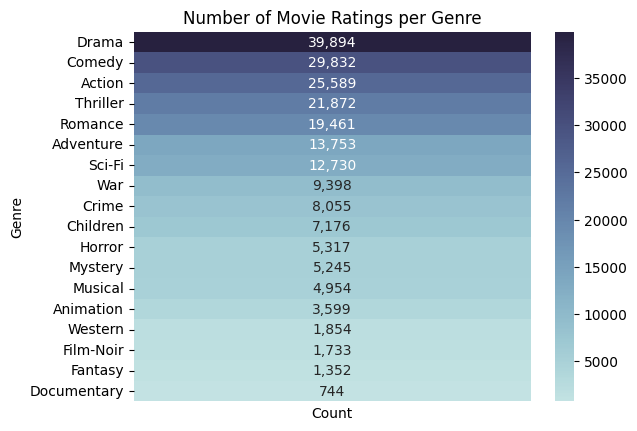

In [25]:
# heatmap
# https://seaborn.pydata.org/tutorial/color_palettes.html
ax = sns.heatmap(genre_df, annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), fmt=",d")
ax.set_title("Number of Movie Ratings per Genre")
ax.set_xlabel("Count") 
ax.set_xticks([])
ax.set_ylabel("Genre")

**2. Which genres have the highest viewer satisfaction (highest ratings)?**

/tmp/ipykernel_82100/3898408034.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(top_genres_df, orient="h", palette=sns.color_palette())
/tmp/ipykernel_82100/3898408034.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(top_genres_df, orient="h", palette=sns.color_palette())


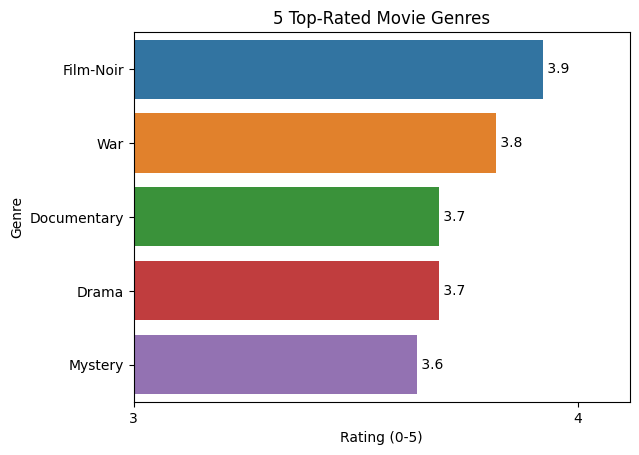

In [ ]:
# get the top 5 genres
# considered in the top if it has the highest average rating
# genre, average rating

top_genres_df = df.groupby("genres")["rating"].mean().nlargest(5)

ax = sns.barplot(top_genres_df, orient="h", palette=sns.color_palette())

ax.set_title("5 Top-Rated Movie Genres")
ax.set_xlabel("Rating (0-5)")
ax.set_ylabel("Genre")

plt.xlim(3)
ax.set_xticks(range(3, 5))
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.1f")

plt.show()

**3. How does mean rating change across movie release years?**


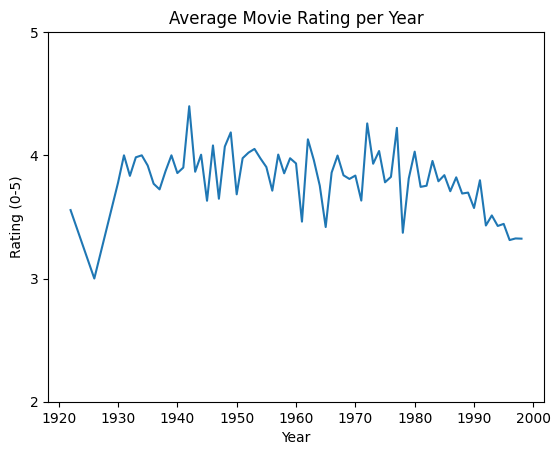

In [ ]:
# What is the average rating for movies every year
# line graph, year and average rating

year_df = df.groupby("year")["rating"].mean()

ax = sns.lineplot(year_df)

ax.set_title("Average Movie Rating per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Rating (0-5)")
ax.set_yticks(range(2, 6))

**4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?**

In [26]:
minimum_rating_count = 50

# get movies with enough ratings
# movie titles, average rating
minimum_rated_movies = df.value_counts("title")[df.value_counts("title") >= minimum_rating_count].index
top_5 = df[df["title"].isin(minimum_rated_movies)].groupby("title")["rating"].mean().nlargest(5).to_frame("average_rating")

top_5

,average_rating
title,
"Close Shave, A (1995)",4.491071
Schindler's List (1993),4.466443
"Wrong Trousers, The (1993)",4.466102
Casablanca (1942),4.456790
Wallace & Gromit: The Best of Aardman Animation (1996),4.447761


Text(50.722222222222186, 0.5, 'Title')

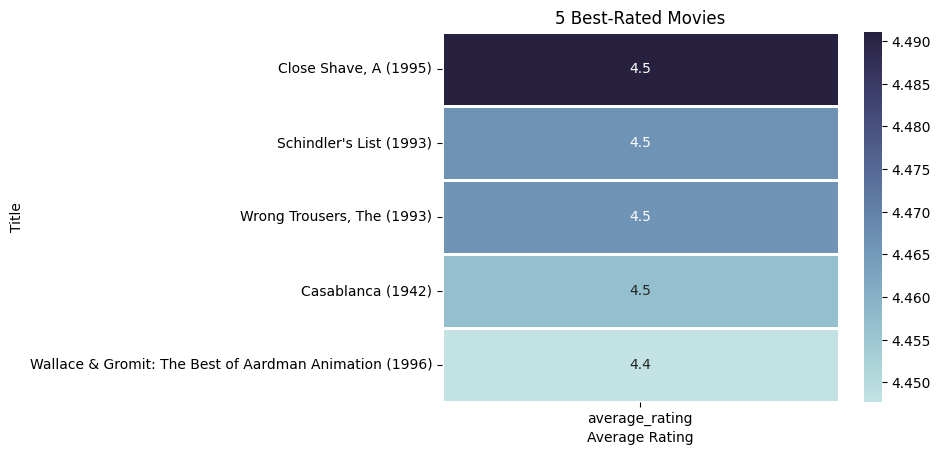

In [22]:
ax = sns.heatmap(top_5, annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), fmt=",.1f", linewidths=1)
ax.set_title("5 Best-Rated Movies")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Title")